# 문제 1. 표본조사 체험하기

### 📘 문제

- 온라인 쇼핑몰은 전체 고객 수가 너무 많아, 모든 고객을 조사하기 어렵습니다.

- 그래서 무작위로 고객 30명을 뽑아 평균 만족도를 계산하고 이를 전체 만족도의 추정값으로 사용하려 합니다.

- 이번 실습에서는 직접 표본을 뽑고, 표본 평균을 구해보며,
  **“표본마다 결과가 달라질 수 있다”**는 추론 통계의 핵심 개념을 체험해봅니다.

### 📌 아래를 수행해 보세요:

- 표본을 무작위로 여러 번 뽑아 보고, 표본 평균이 어떻게 변하는지 확인해봅시다.

- 히스토그램을 그리고, 표본 평균의 분포 형태를 관찰해봅시다.



In [29]:
# 파이썬 라이브러리 및 모듈 가져오기 & 한글 폰트 설정하기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

# MacOS에서는 기본 한글 폰트로 AppleGothic 사용
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

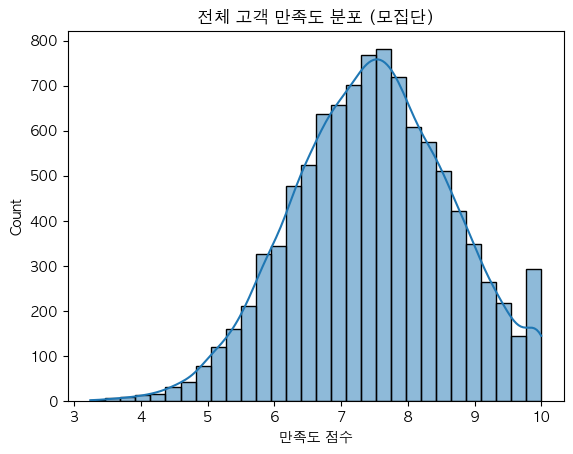

In [30]:
# 모집단 생성 (전체 고객 만족도 10,000명)
np.random.seed(2025)
population = np.random.normal(loc=7.5, scale=1.2, size=10000)       # 평균 7.5, 표준편차 1.2
population = np.clip(population, 1, 10)     # 1점 ~ 10점 사이로 제한
df_pop = pd.DataFrame({'score': population})

# 전체 모집단 시각화
sns.histplot(df_pop['score'], bins = 30, kde=True)
plt.title("전체 고객 만족도 분포 (모집단)")
plt.xlabel("만족도 점수")
plt.show()

In [31]:
# Q1. 모집단에서 무작위로 30명을 뽑아 표본 평균을 구해봅시다.
sample = np.random.choice(df_pop['score'], size=30, replace=False)   # replace=False: 한 번 뽑힌 사람은 다시 뽑지 않음(비복원 추출)
sample_mean = sample.mean()
print("표본 평균:", round(sample_mean, 2))

표본 평균: 7.2


In [32]:
# Q2. 이 과정을 500번 반복하고, 표본 평균을 리스트에 저장합니다.
sample_means = []

for _ in range(500):
    sample = np.random.choice(df_pop['score'], size=30, replace=False)
    sample_means.append(sample.mean())

df_sample_means = pd.DataFrame({'mean': sample_means})
df_sample_means.head()

,mean
0,7.218310
1,7.576377
2,7.603218
3,7.258919
4,7.558776


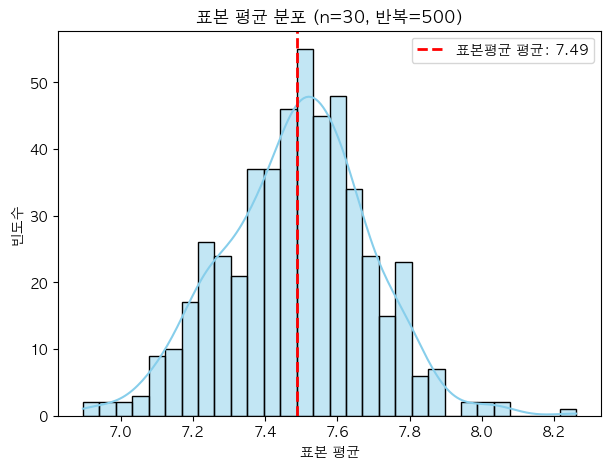

In [33]:
# Q3. 표본 평균들의 분포를 히스토그램으로 그려봅시다. 평균선도 함께 표시해 봅시다.

# 표본 평균들의 분포 시각화
plt.figure(figsize=(7, 5))
sns.histplot(sample_means, bins=30, kde=True, color="skyblue", edgecolor="black")

# 평균선 표시
mean_of_means = np.mean(sample_means)
plt.axvline(mean_of_means, color='red', linestyle='--', linewidth=2, label=f'표본평균 평균: {mean_of_means:.2f}')

plt.title("표본 평균 분포 (n=30, 반복=500)")
plt.xlabel("표본 평균")
plt.ylabel("빈도수")
plt.legend()
plt.show()

### 🧠 데이터를 어떻게 읽을까요?

- 표본 평균들은 어떤 값 주변에 많이 분포해 있나요? 이 값은 전체 모집단 평균과 얼마나 비슷한가요?

- 표본을 1번 뽑았을 때와 500번을 반복해서 뽑았을 때, 표본 평균의 분포나 신뢰성에는 어떤 차이가 있나요

- 친구가 다른 표본을 뽑았다면 같은 평균이 나왔을까요? 비슷한 결과가 나왔더라도 완전히 같지 않았다면, 그 이유는 무엇일까요?

- 표본 평균들의 분포는 어떤 모양인가요? 종 모양의 정규분포처럼 보이나요? 그렇다면 왜 그렇게 되는 걸까요?


### 🧠 데이터를 어떻게 읽을까요?

- 표본 평균들은 어떤 값 주변에 많이 분포해 있나요? 이 값은 전체 모집단 평균과 얼마나 비슷한가요?  
-> 표본 평균들은 모집단 평균(약 7.5) 주변에 몰려 있다. 즉, 무작위 추출로 계산한 표본 평균이 모집단 평균을 잘 추정하고 있음을 알 수 있다.  

- 표본을 1번 뽑았을 때와 500번을 반복해서 뽑았을 때, 표본 평균의 분포나 신뢰성에는 어떤 차이가 있나요?  
-> 1번만 뽑으면 표본 평균은 우연에 따라 크게 달라질 수 있다. 하지만 500번 반복하면 분포를 통해 평균이 어느 범위에 자주 위치하는지 알 수 있어서 훨씬 신뢰성이 높아진다.  

- 친구가 다른 표본을 뽑았다면 같은 평균이 나왔을까요? 비슷한 결과가 나왔더라도 완전히 같지 않았다면, 그 이유는 무엇일까요?  
-> 같은 모집단에서 뽑아도 무작위성이 있어서 결과가 조금씩 달라진다. 하지만 모집단 평균 근처에서 분포하므로 크게 벗어나진 않는다.  

- 표본 평균들의 분포는 어떤 모양인가요? 종 모양의 정규분포처럼 보이나요? 그렇다면 왜 그렇게 되는 걸까요?  
-> 표본 평균들의 분포는 종 모양의 정규분포 형태를 띠고 있다. 이는 중심극한정리에 의해, 표본 크기가 충분히 크면 모집단의 분포 모양과 관계없이 표본 평균 분포가 정규분포에 가까워지기 때문이다.  


# 문제 2. 중심극한정리

### 📘 문제

- 현실에서는 모집단의 분포가 정규분포가 아닐 수도 있습니다.

- 예를 들어, 일부 고객은 매우 높은 점수를 주고, 대부분은 낮은 점수를 주는 만족도 분포가 있을 수 있죠. (예: 지수분포)

- 이처럼 원래 분포가 비정규분포여도,
  표본을 여러 번 뽑아 평균을 계산하면, 그 평균들의 분포는 정규분포에 가까워진다는 것을
  **중심극한정리(Central Limit Theorem)**라고 합니다.

- 이번 실습에서는 다양한 크기의 표본을 뽑아 평균을 계산하고,
  그 평균들의 분포가 어떻게 변하는지를 직접 실험해 봅니다.

### 📌 아래를 수행해 보세요:

- 비대칭적인 모집단(지수분포)에서 무작위로 표본을 추출해 평균을 구해봅시다.

- 표본 크기를 바꿔가며, 표본 평균들의 분포가 어떻게 변화하는지 확인해봅시다.

- 히스토그램을 그리고, 분포의 모양을 관찰해봅시다.

- 표본 크기가 커질수록 표본 평균 분포의 모양과 **퍼진 정도(분산)**가 어떻게 변하는지 관찰해봅시다.


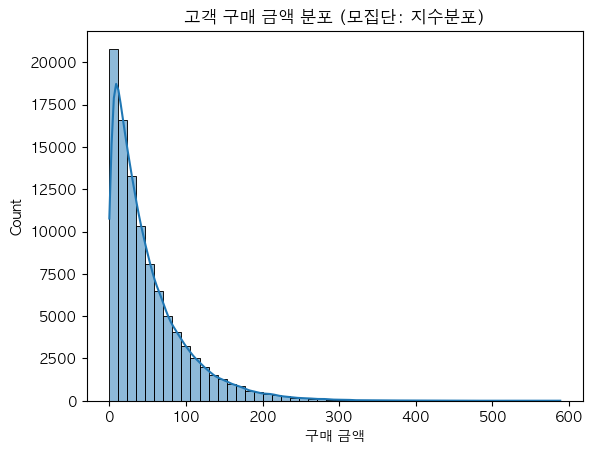

In [34]:
# 지수분포를 따르는 모집단 생성
np.random.seed(2025)
population = np.random.exponential(scale=50, size=100000)   # 평균 50, 비대칭 분포

# 모집단 시각화
sns.histplot(population, bins=50, kde=True)
plt.title("고객 구매 금액 분포 (모집단: 지수분포)")
plt.xlabel("구매 금액")
plt.show()

In [35]:
# Q1. 모집단에서 표본을 1000번 뽑고, 각 표본의 평균을 구해봅시다.
# 표본 크기 = 5일 때

sample_means_5 = [np.random.choice(population, size=5, replace=False).mean() for _ in range(1000)]

In [36]:
# Q2. 위 과정을 표본 크기 30, 100일 때도 반복해봅시다.
# sample_size = 30, 100

sample_means_30 = [np.random.choice(population, size=30, replace=False).mean() for _ in range(1000)]
sample_means_100 = [np.random.choice(population, size=100, replace=False).mean() for _ in range(1000)]

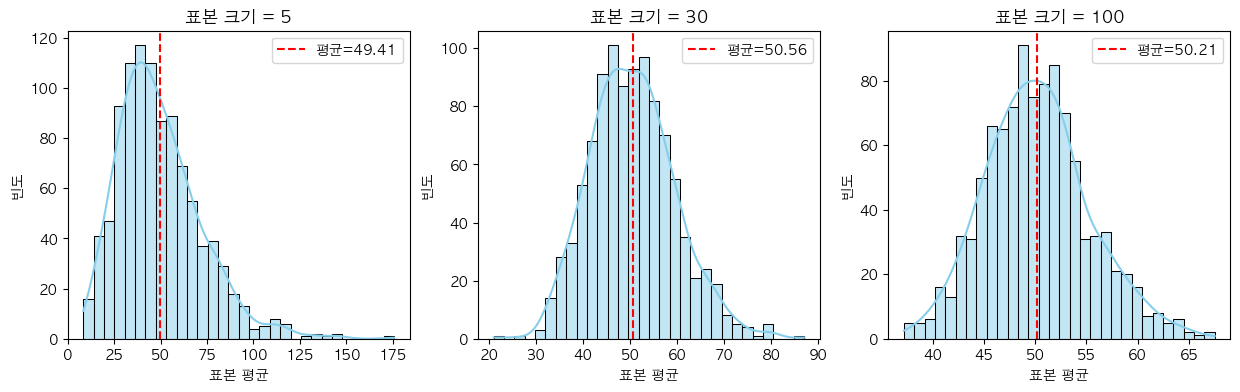

In [37]:
# Q3. 각 표본 크기별로 표본 평균들의 분포를 히스토그램으로 그려봅시다.
# 평균선을 함께 표시해 봅시다.

plt.figure(figsize=(15,4))

# 표본 크기 5
plt.subplot(1,3,1)
sns.histplot(sample_means_5, bins=30, kde=True, color="skyblue", edgecolor="black")
plt.axvline(np.mean(sample_means_5), color="red", linestyle="--", label=f"평균={np.mean(sample_means_5):.2f}")
plt.title("표본 크기 = 5")
plt.xlabel("표본 평균")
plt.ylabel("빈도")
plt.legend()

# 표본 크기 30
plt.subplot(1,3,2)
sns.histplot(sample_means_30, bins=30, kde=True, color="skyblue", edgecolor="black")
plt.axvline(np.mean(sample_means_30), color="red", linestyle="--", label=f"평균={np.mean(sample_means_30):.2f}")
plt.title("표본 크기 = 30")
plt.xlabel("표본 평균")
plt.ylabel("빈도")
plt.legend()

# 표본 크기 100
plt.subplot(1,3,3)
sns.histplot(sample_means_100, bins=30, kde=True, color="skyblue", edgecolor="black")
plt.axvline(np.mean(sample_means_100), color="red", linestyle="--", label=f"평균={np.mean(sample_means_100):.2f}")
plt.title("표본 크기 = 100")
plt.xlabel("표본 평균")
plt.ylabel("빈도")
plt.legend()


### 🧠 데이터를 어떻게 읽을까요?

- 표본 크기가 작을 때 (예: 5), 평균들의 분포는 어떤 모양인가요?  
-> 분포가 넓고 들쭉날쭉하며, 원래 모집단(지수분포)의 비대칭적인 모습이 조금 남아 있다.

- 표본 크기가 커질수록 평균 분포의 모양은 어떤 변화를 보이나요?  
-> 점점 대칭적인 종 모양(정규분포 형태)에 가까워진다.

- 원래 모집단은 비대칭이었는데, 왜 평균들의 분포는 정규분포처럼 바뀌었을까요?  
-> 중심극한정리 때문에, 모집단의 분포 형태가 무엇이든 표본 평균의 분포는 표본 크기가 충분히 크면 정규분포에 수렴한다.

- 이 실험을 통해 중심극한정리를 어떻게 이해하게 되었나요?  
->표본 평균은 모집단 평균을 잘 추정하고, 표본 크기가 커질수록 분포가 안정되며 정규분포 형태로 가까워진다.

- 표본 크기에 따라 **분포의 넓이(흩어짐)**는 어떻게 달라지나요?  
-> 표본 크기가 작을수록 분포가 넓게 퍼져서 변동성이 크고, 표본 크기가 커질수록 분포가 좁아져 평균이 모집단 평균 주변에 더 밀집한다.


# 문제 3. 표준오차

### 📘 문제

- 앞선 실습에서 우리는 **표본 크기(n)가 커질수록 표본 평균들의 분포가 더 좁아진다**는 것을 확인했습니다.
- 이처럼 표본 평균들이 얼마나 흩어져 있는지(분포의 퍼진 정도)를 나타내는 값을 **표준오차(Standard Error, SE)**라고 부릅니다.
- 표준오차는 **표본 평균들의 표준편차**와 같은 의미이며, 이는 우리가 뽑은 표본 평균이 실제 모평균과 평균적으로 얼마나 떨어져 있을지를 나타내는 **'예상 오차의 크기'**입니다.

- 통계학적으로 이 표준오차는 **`SE = σ / √n`** (모집단 표준편차 / 표본 크기의 제곱근) 이라는 공식으로 계산할 수 있습니다.
- 이 공식은 **표본 크기(n)가 커질수록 표준오차(SE)가 작아진다**는 것을 명확히 보여줍니다.

- 이번 실습에서는 여러 크기의 표본을 뽑아, 시뮬레이션을 통해 얻은 **표본 평균들의 표준편차(실험값)**가 공식으로 계산한 **표준오차(이론값)**와 얼마나 일치하는지 직접 확인해봅니다.


### 📌 아래를 수행해 보세요:

- 모집단에서 여러 크기의 표본(10, 30, 100, 500)을 각각 1000번 뽑고, 그 평균들을 구한 뒤, **표본 평균들의 표준편차(=실험적 표준오차)**를 계산해봅시다.

- 이 결과를 이론적인 표준오차 공식과 비교하는 표를 만들고, 시각화해봅시다.

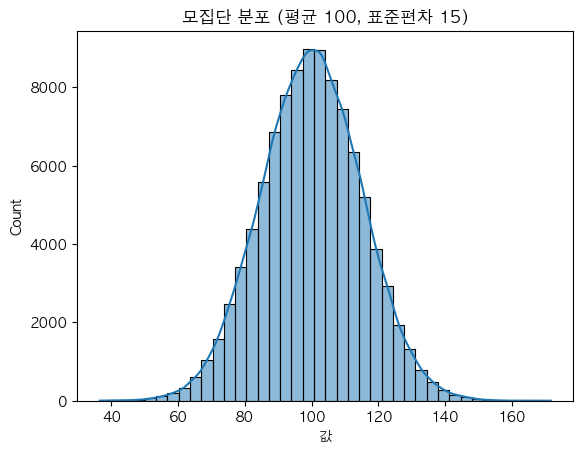

In [38]:
# 모집단 생성 (평균 100, 표준편차 15)
np.random.seed(2025)
population = np.random.normal(loc=100, scale=15, size=100000)

# 모집단 시각화
sns.histplot(population, bins=40, kde=True)
plt.title("모집단 분포 (평균 100, 표준편차 15)")
plt.xlabel("값")
plt.show()

In [43]:
# Q1. 표본 크기 10, 30, 100, 500에 대해 각각 1000번 표본을 뽑고, 평균을 구해봅시다.
# 각 표본 평균 분포의 표준편차를 계산해봅시다.
# 결과를 리스트에 저장하고, 표로 정리해봅시다.

sample_sizes = [10, 30, 100, 500]
reps = 1000

def empirical_se_and_mean(n, reps=1000):
    means = np.empty(reps)
    for i in range(reps):
        means[i] = np.random.choice(population, size=n, replace=False).mean()
    return means.std(ddof=1), means.mean()

rows = []
for n in sample_sizes:
    se_emp, mean_of_means = empirical_se_and_mean(n, reps)
    rows.append({"n": n, "empirical_SE":se_emp, "means_mean": mean_of_means})

se_df = pd.DataFrame(rows)
se_df

,n,empirical_SE,means_mean
0,10,4.747610,99.911762
1,30,2.630611,99.822905
2,100,1.537982,99.980490
3,500,0.662958,99.940109


In [45]:
# Q2. 이론적인 표준오차와 비교해봅시다.
# [공식] 표준오차(SE) = 모집단 표준편차 / √표본크기

sigma = np.std(population, ddof=0)  # 모집단 표준편차 (ddof=0: 모표준편차)
se_df['theoretical_SE'] = sigma / np.sqrt(se_df["n"])
se_df["ratio_emp/theory"] = se_df["empirical_SE"] / se_df["theoretical_SE"]

display_df = se_df.copy()
display_df[["empirical_SE","theoretical_SE","ratio_emp/theory","means_mean"]] = \
    display_df[["empirical_SE","theoretical_SE","ratio_emp/theory","means_mean"]].round(3)
display_df

,n,empirical_SE,means_mean,theoretical_SE,ratio_emp/theory
0,10,4.748,99.912,4.754,0.999
1,30,2.631,99.823,2.745,0.958
2,100,1.538,99.980,1.503,1.023
3,500,0.663,99.940,0.672,0.986


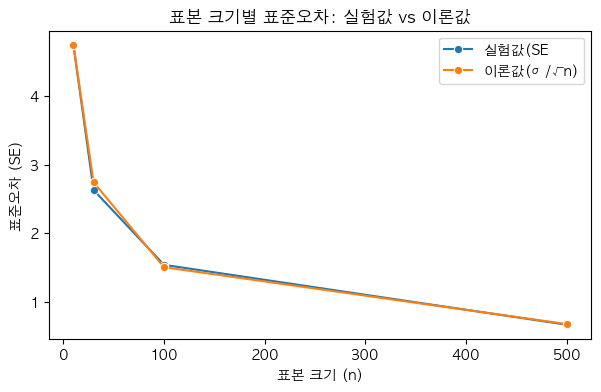

In [47]:
# Q3. 실험값과 이론값을 시각화해봅시다.
# 표본 크기를 x축, 표준오차를 y축으로 한 꺾은선 그래프를 그려봅시다.

plt.figure(figsize=(7,4))
sns.lineplot(x="n", y="empirical_SE", data=se_df, marker="o", label="실험값(SE")
sns.lineplot(x="n", y="theoretical_SE", data=se_df, marker="o", label="이론값(σ/√n)")
plt.title("표본 크기별 표준오차: 실험값 vs 이론값")
plt.xlabel("표본 크기 (n)")
plt.ylabel("표준오차 (SE)")
plt.legend()
plt.show()

### 🧠 데이터를 어떻게 읽을까요?

- 표본 크기가 작을수록, 표본 평균의 분포는 어떤 모양인가요? 넓게 퍼져 있나요?  
-> 표본 크기가 작으면 분포가 넓게 퍼지고 들쭉날쭉해, 평균이 모평균에서 더 크게 흔들릴 수 있다.

- 표본 크기가 커질수록, 평균 분포는 어떻게 변하나요?  
-> 점점 좁고 뾰족해지며, 모평균 근처에 밀집한다. (평균이 더 안정적으로 추청된다.)

- 실험값과 이론값(공식 계산값)은 얼마나 비슷한가요?  
-> 두 값이 거의 일치한다. 실험적으로 얻은 표준오차와 공식 SE = σ / √n 계산값이 비슷해, 이론이 실제로도 잘 맞음을 보여준다.

- 왜 표본 크기가 커질수록 표준오차는 작아질까요?  
-> 표본이 많아질수록 우연에 의한 흔들림이 줄어들고, 평균이 모평균에 더 가깝게 수렴하기 때문이다. (표본이 커지면 평균이 덜 흔들려서 오차가 줄어든다.)
